In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import sys
import os

# Fix the path to find your modules
# Get the directory where the notebook is located and navigate to project root
notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)  # Go up one level from notebooks/
sys.path.append(os.path.join(project_root, 'src', 'python'))

print(f"Notebook directory: {notebook_dir}")
print(f"Project root: {project_root}")
print(f"Looking for modules in: {os.path.join(project_root, 'src', 'python')}")

# Now try to import
try:
    from database_manager import DatabaseManager
    print("DatabaseManager imported successfully")
except ImportError as e:
    print(f"Import error: {e}")
    print("Let's check what files exist:")
    python_dir = os.path.join(project_root, 'src', 'python')
    if os.path.exists(python_dir):
        files = os.listdir(python_dir)
        print(f"Files in {python_dir}: {files}")
    else:
        print(f"Directory {python_dir} doesn't exist!")

Notebook directory: /Users/Claire/Desktop/cross-asset-factor-engine/notebooks
Project root: /Users/Claire/Desktop/cross-asset-factor-engine
Looking for modules in: /Users/Claire/Desktop/cross-asset-factor-engine/src/python
DatabaseManager imported successfully


2025-06-27 15:42:37,208 - WARNING - Schema file not found, creating basic tables


Available tickers: ['GLD', 'HYG', 'LQD', 'SPY', 'TLT']
Price data shape: (21, 5)
Date range: 2019-01-02 00:00:00 to 2019-01-31 00:00:00

=== Price Data Summary ===
              GLD        HYG        LQD         SPY         TLT
count   21.000000  21.000000  21.000000   21.000000   21.000000
mean   122.240476  59.817916  91.634286  235.262229  102.209642
std      1.098120   0.762646   0.775968    5.567789    0.781564
min    121.019997  57.848232  90.805389  220.885971  101.005188
25%    121.449997  59.805332  91.046135  232.816223  101.689476
50%    121.879997  60.019611  91.359116  236.054306  102.162582
75%    122.430000  60.183910  92.249939  238.378860  102.584946
max    124.750000  60.791008  93.590141  244.149506  104.367538

=== Returns Data Summary ===
             GLD        HYG        LQD        SPY        TLT
count  20.000000  20.000000  20.000000  20.000000  20.000000
mean    0.001406   0.002496   0.001505   0.003872  -0.000059
std     0.005683   0.005068   0.002234   0.0117

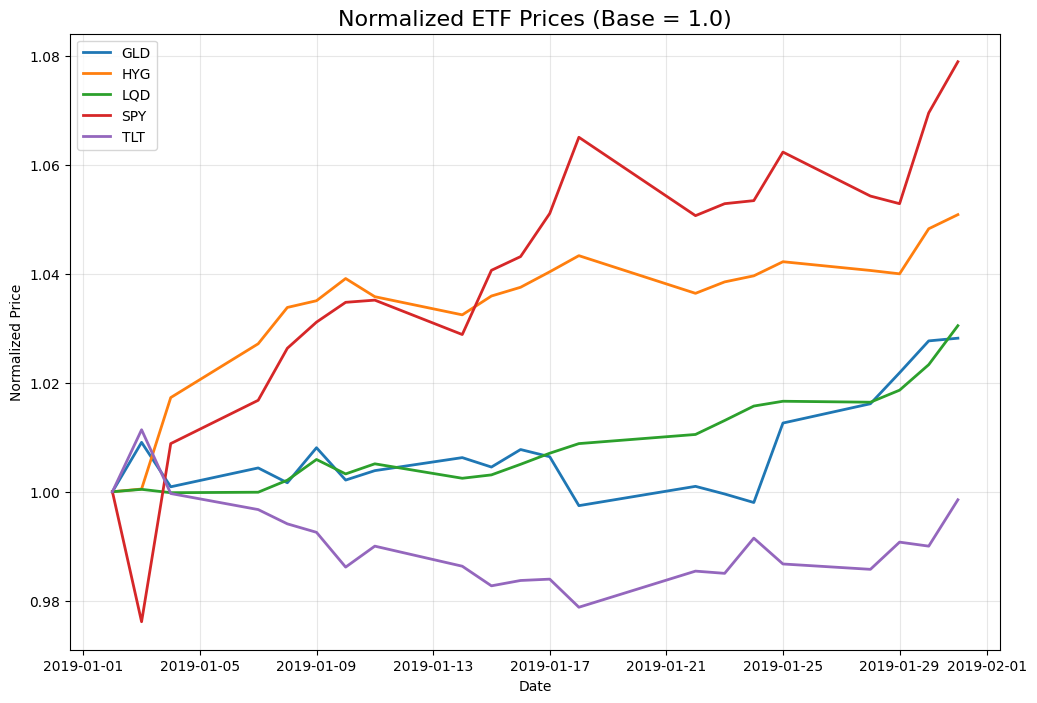

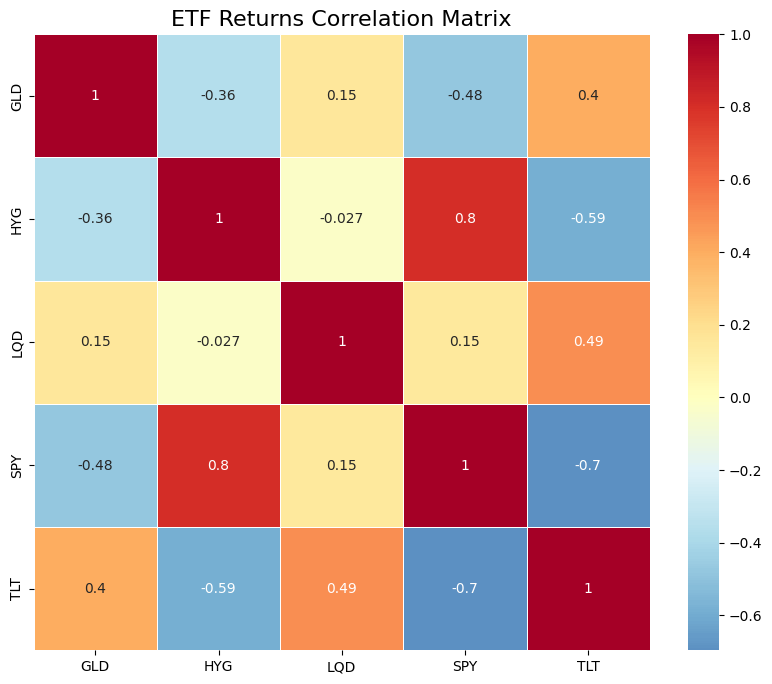


=== Correlation Matrix ===
       GLD    HYG    LQD    SPY    TLT
GLD  1.000 -0.361  0.153 -0.477  0.403
HYG -0.361  1.000 -0.027  0.802 -0.589
LQD  0.153 -0.027  1.000  0.147  0.492
SPY -0.477  0.802  0.147  1.000 -0.697
TLT  0.403 -0.589  0.492 -0.697  1.000


In [15]:
# Initialize database
db = DatabaseManager("../data/factor_engine.db")

# Load data
tickers = db.get_available_tickers()
print(f"Available tickers: {tickers}")

# Get price data for all tickers
all_prices = {}
for ticker in tickers:
    prices = db.get_etf_prices(ticker=ticker)
    if not prices.empty:
        all_prices[ticker] = prices.set_index('date')['adj_close']

# Create price dataframe
price_df = pd.DataFrame(all_prices)
price_df = price_df.sort_index()

print(f"Price data shape: {price_df.shape}")
print(f"Date range: {price_df.index[0]} to {price_df.index[-1]}")

# Calculate returns
returns_df = price_df.pct_change().dropna()

# Basic statistics
print("\n=== Price Data Summary ===")
print(price_df.describe())

print("\n=== Returns Data Summary ===")
print(returns_df.describe())

# Plot prices (normalized)
plt.figure(figsize=(12, 8))
normalized_prices = price_df / price_df.iloc[0]
for ticker in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker, linewidth=2)

plt.title("Normalized ETF Prices (Base = 1.0)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = returns_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5)
plt.title("ETF Returns Correlation Matrix", fontsize=16)
plt.show()

print("\n=== Correlation Matrix ===")
print(correlation_matrix.round(3))